# Signal reflection

In this notebook we evaluate the power reflection spectrum of the acousto-optic deflectors from the network analyzer.

In [1]:
import os
import numpy as np
import pandas as pd

cmap = plt.get_cmap('tab20c')

from matplotlib import pyplot as plt

datadir = '../../dataset/signal/reflection'
figuredir = '../../figure/signal/reflection'

os.makedirs(figuredir, exist_ok=True)

def read(filename):
    return pd.read_csv(filename, skiprows=3, header=None, usecols=[0, 1], names=['frequency', 'reflection'])

In [2]:
runs = {}

for filename in os.listdir(datadir):
    if not filename.endswith('.csv'):
        continue
        
    runs[filename.split('.csv')[0]] = read(os.path.join(datadir, filename))

The network analyzer can only provide up to 10 dBm output power, however the AOD have to be driven by about 33 dBm, thus we only conducted one measurement at 10 dBm with the network analyzer directly attached to the AOD and measuring its reflection as can be seen below.

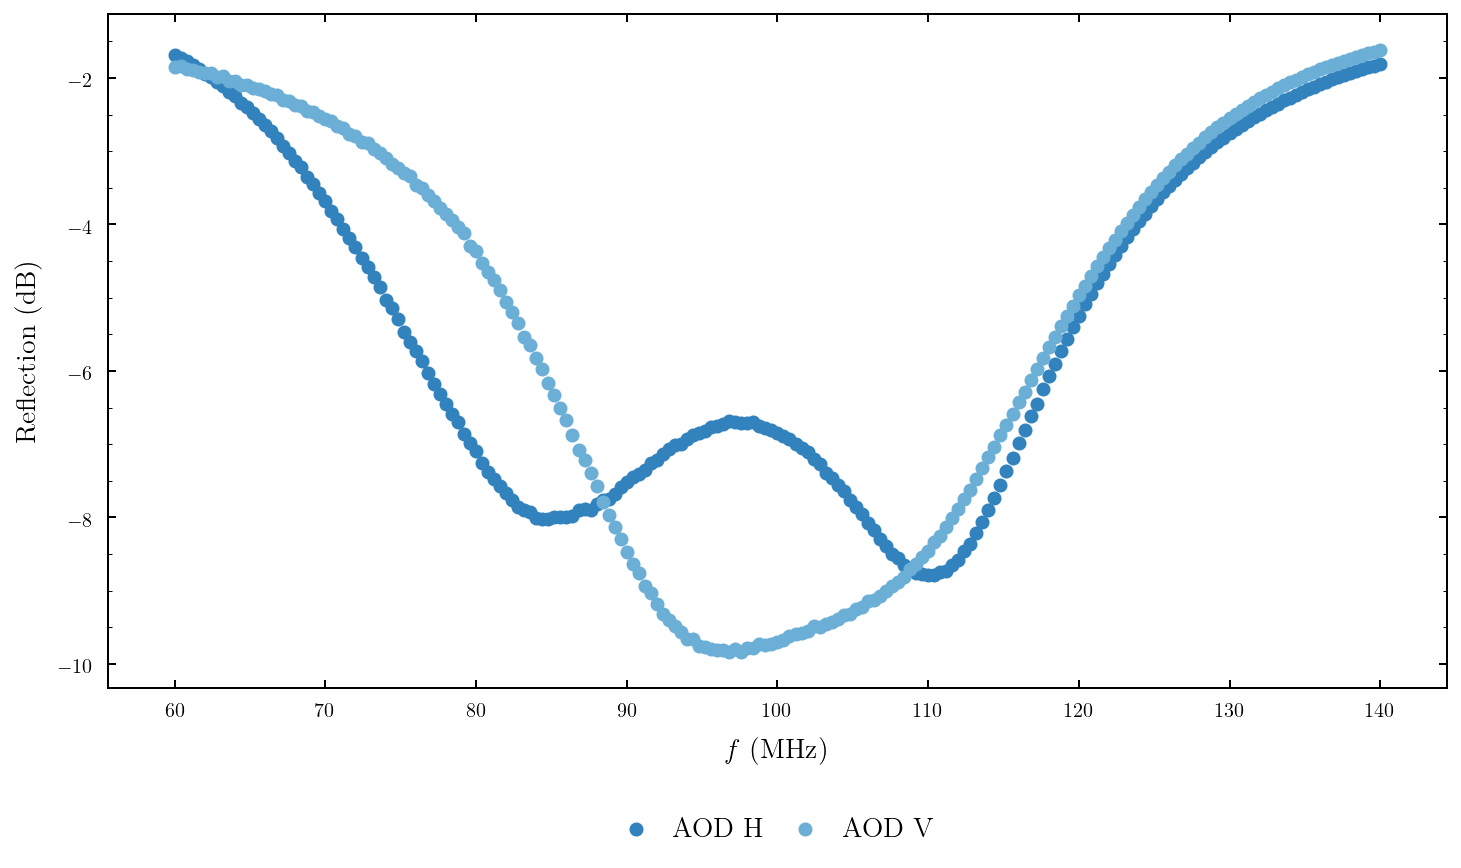

In [5]:
plt.figure(figsize=(12, 6))

h = runs['10dBm-horizontal']
v = runs['10dBm-vertical']

plt.scatter(h.frequency / 1e6, h.reflection, label='AOD H', color=cmap.colors[0])
plt.scatter(v.frequency / 1e6, v.reflection, label='AOD V', color=cmap.colors[1])

plt.xlabel('$f$ (\si{\mega\hertz})')
plt.ylabel('Reflection (\si{\decibel})')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.subplots_adjust(top=.98, bottom=.20)
plt.savefig(os.path.join(figuredir, 'direct.pdf'))
plt.savefig(os.path.join(figuredir, 'direct.pgf'))
plt.show()

Other measurements were conducted with a direct coupler and the amplifiers. The direct coupler allows us to measure part of the reflection without damaging the network analyzer and causing signal interference. However the direct coupler itself is an additional frequency dependency, thus in one trial we just measured its frequency behaviour.

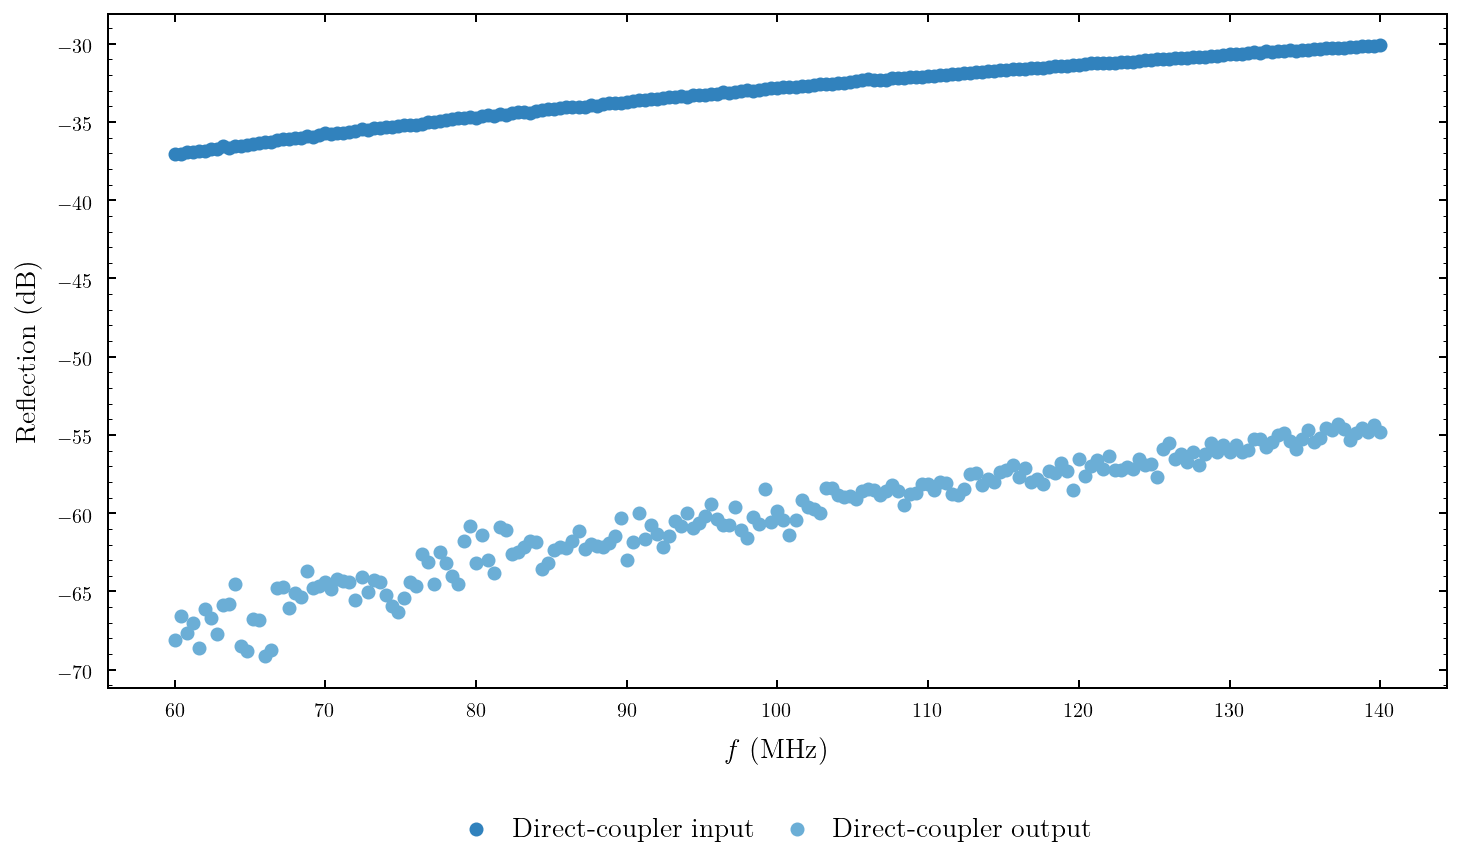

In [10]:
x = runs['-10dBm-in']
y = runs['-10dBm-out']

plt.figure(figsize=(12, 6))
plt.scatter(x.frequency / 1e6, x.reflection, label='Direct-coupler input', color=cmap.colors[0])
plt.scatter(y.frequency / 1e6, y.reflection, label='Direct-coupler output', color=cmap.colors[1])
plt.xlabel('$f$ (\si{\mega\hertz})')
plt.ylabel('Reflection (\si{\decibel})')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.subplots_adjust(top=.98, bottom=.20)
plt.savefig(os.path.join(figuredir, 'coupler.pdf'))
plt.savefig(os.path.join(figuredir, 'coupler.pgf'))
plt.show()

We observe that the network analyzer itself has a linear frequency dependence. The direct-coupler seems to introduce some noise on top. We should also note that the noise is significantly higher at low powers. We assume for the following that it is sufficient to just subtract the input reflection from the output reflection to account for these effects.

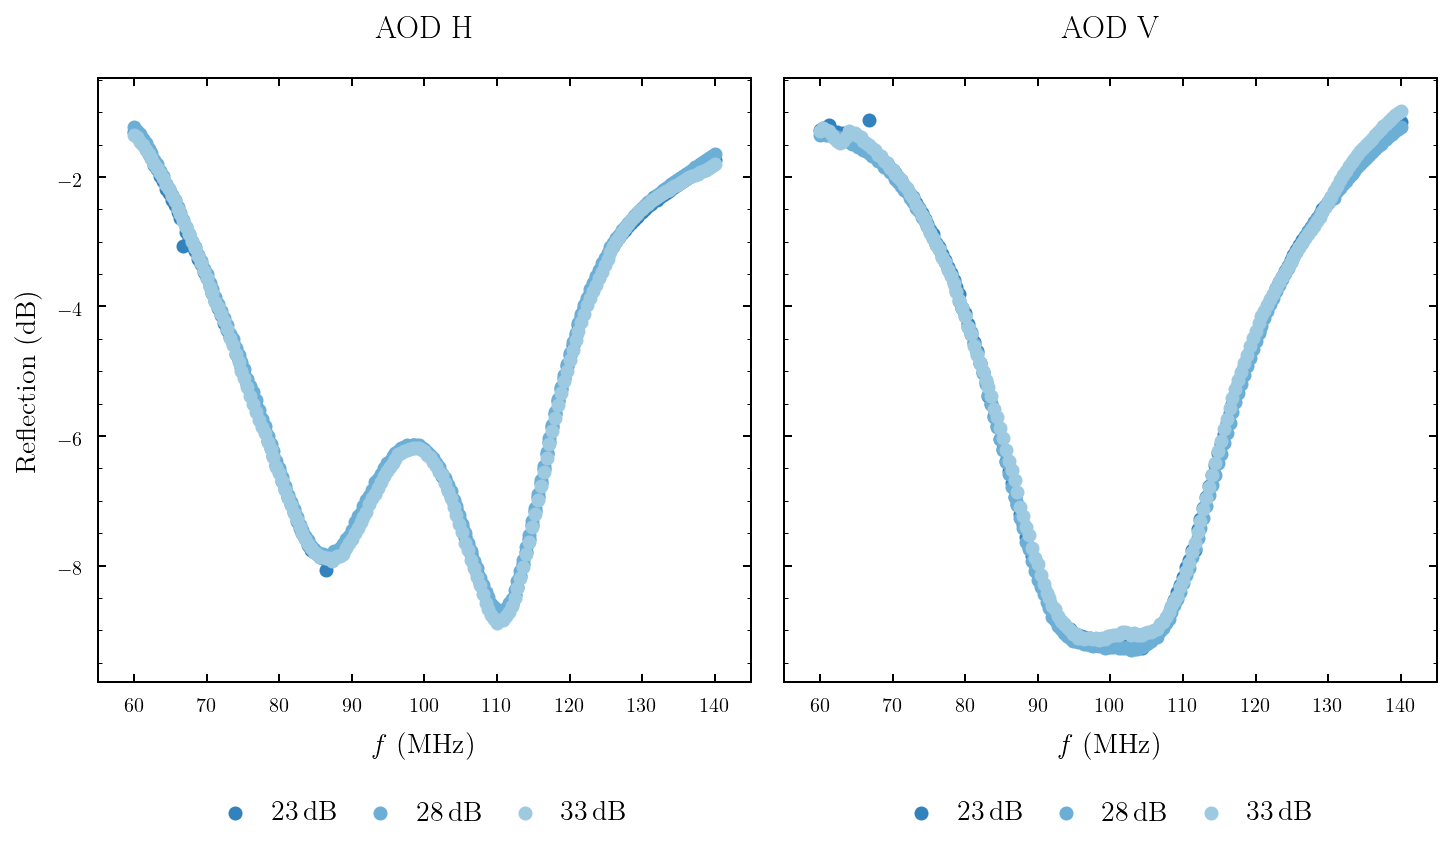

In [15]:
hin23 = runs['23dBm-hin']
hin28 = runs['28dBm-hin']
hin33 = runs['33dBm-hin']

hout23 = runs['23dBm-hout']
hout28 = runs['28dBm-hout']
hout33 = runs['33dBm-hout']

vin23 = runs['23dBm-vin']
vin28 = runs['28dBm-vin']
vin33 = runs['33dBm-vin']

vout23 = runs['23dBm-vout']
vout28 = runs['28dBm-vout']
vout33 = runs['33dBm-vout']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

axes[0].scatter(hin23.frequency / 1e6, hout23.reflection - hin23.reflection, label='\SI{23}{\decibel}', color=cmap.colors[0])
axes[0].scatter(hin28.frequency / 1e6, hout28.reflection - hin28.reflection, label='\SI{28}{\decibel}', color=cmap.colors[1])
axes[0].scatter(hin33.frequency / 1e6, hout33.reflection - hin33.reflection, label='\SI{33}{\decibel}', color=cmap.colors[2])

axes[0].set_title('AOD H')
axes[0].set_xlabel('$f$ (\si{\mega\hertz})')
axes[0].set_ylabel('Reflection (\si{\decibel})')
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

axes[1].scatter(vin23.frequency / 1e6, vout23.reflection - vin23.reflection, label='\SI{23}{\decibel}', color=cmap.colors[0])
axes[1].scatter(vin28.frequency / 1e6, vout28.reflection - vin28.reflection, label='\SI{28}{\decibel}', color=cmap.colors[1])
axes[1].scatter(vin33.frequency / 1e6, vout33.reflection - vin33.reflection, label='\SI{33}{\decibel}', color=cmap.colors[2])

axes[1].set_title('AOD V')
axes[1].set_xlabel('$f$ (\si{\mega\hertz})')
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.subplots_adjust(top=.9, bottom=.20, wspace=.05)
plt.savefig(os.path.join(figuredir, 'coupled.pgf'))
plt.savefig(os.path.join(figuredir, 'coupled.pdf'))
plt.show()

In [17]:
amph = pd.read_csv(os.path.join(datadir, '../amplification/hlog.csv'), skiprows=3, names=['frequency', 'transmission'], header=None, usecols=[0, 1])
ampv = pd.read_csv(os.path.join(datadir, '../amplification/vlog.csv'), skiprows=3, names=['frequency', 'transmission'], header=None, usecols=[0, 1])

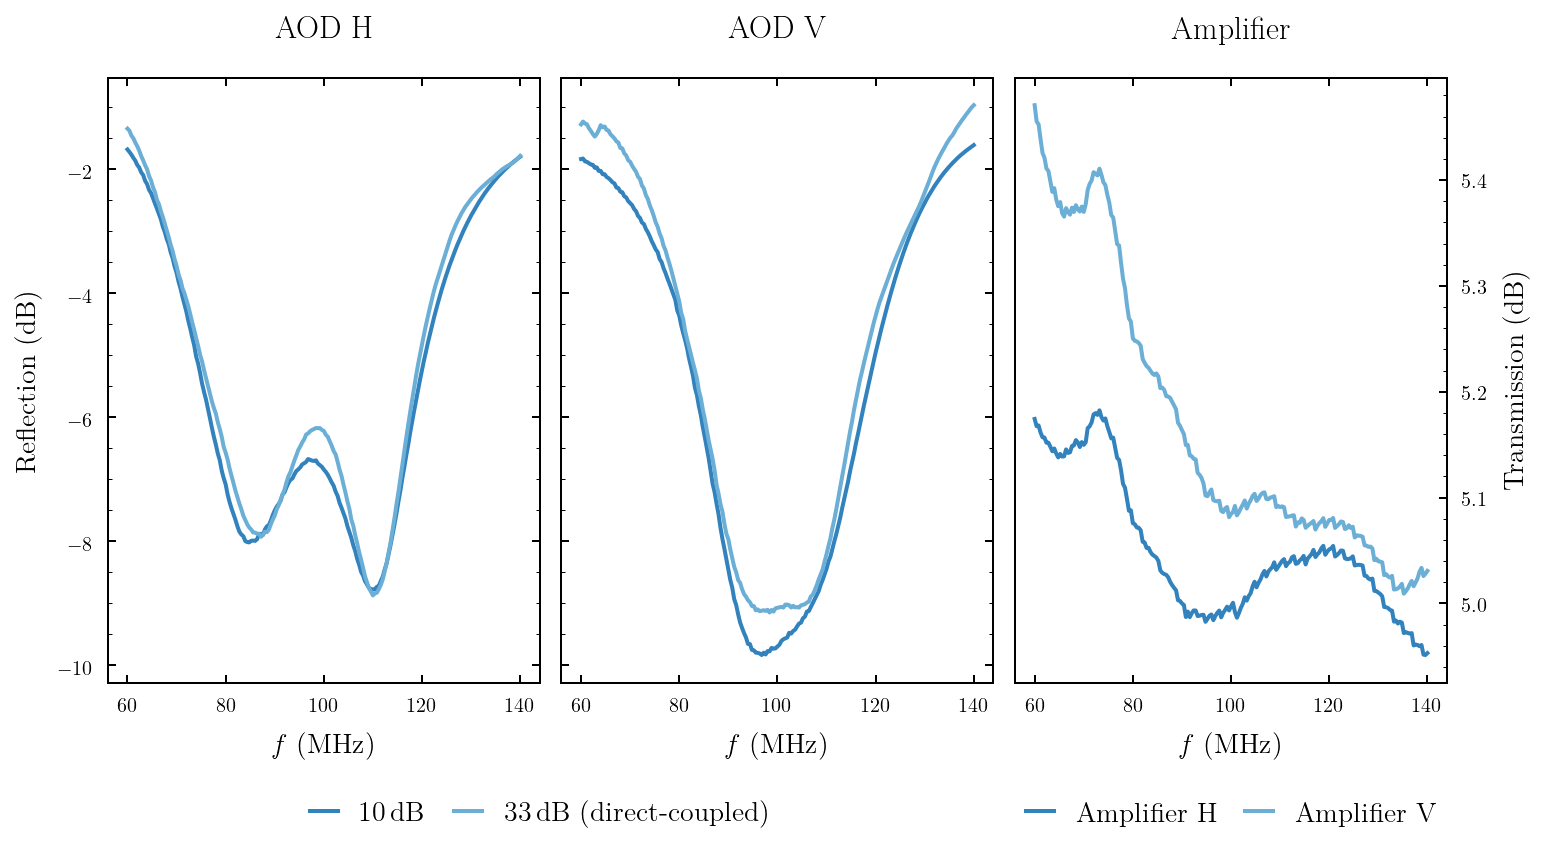

In [27]:
h = runs['10dBm-horizontal']
v = runs['10dBm-vertical']

plt.figure(figsize=(12, 6))

ax0 = plt.subplot(131)
ax0.plot(h.frequency / 1e6, h.reflection, label='\SI{10}{\decibel}', color=cmap.colors[0])
ax0.plot(hin33.frequency / 1e6, hout33.reflection - hin33.reflection, label='\SI{33}{\decibel} (direct-coupled)', color=cmap.colors[1])
ax0.set_title('AOD H')
ax0.set_xlabel('$f$ (\si{\mega\hertz})')
ax0.set_ylabel('Reflection (\si{\decibel})')
ax0.legend(loc='upper center', bbox_to_anchor=(1., -0.15), ncol=2)

ax1 = plt.subplot(132, sharey=ax0)
ax1.plot(v.frequency / 1e6, v.reflection, label='\SI{10}{\decibel}', color=cmap.colors[0])
ax1.plot(vin33.frequency / 1e6, vout33.reflection - vin33.reflection, label='\SI{33}{\decibel} (direct-coupled)', color=cmap.colors[1])
ax1.set_title('AOD V')
ax1.set_xlabel('$f$ (\si{\mega\hertz})')
ax0.get_shared_y_axes().join(ax0, ax1)
#ax1.set_yticklabels([])

ax2 = plt.subplot(133)
ax2.plot(amph.frequency / 1e6, amph.transmission, label='Amplifier H', color=cmap.colors[0])
ax2.plot(ampv.frequency / 1e6, ampv.transmission, label='Amplifier V', color=cmap.colors[1])
ax2.set_title('Amplifier')
ax2.set_xlabel('$f$ (\si{\mega\hertz})')
ax2.set_ylabel('Transmission (\si{\decibel})')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.setp(ax1.get_yticklabels(), visible=False)

plt.subplots_adjust(top=.9, bottom=.20, wspace=.05)
plt.savefig(os.path.join(figuredir, 'comparison.pdf'))
plt.savefig(os.path.join(figuredir, 'comparison.pgf'))
plt.show()